<a href="https://colab.research.google.com/github/Seongjin1225/AI_SCHOOL_9/blob/main/ML%26DL/12%EC%9B%94%2011%EC%9D%BC/12%EC%9B%94_11%EC%9D%BC_%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machine

In [ ]:
!pip install mglearn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn  # Dataset을 가져오기 위한 utility module
from sklearn.svm import SVC  # SVR, SVC - regresser, classifier, 분류 작업할거기 때문에
                             # SVC 이용
# decision boundaries가 잘 만들어졌는지 확인!
# 일반적인 방식으로는 그래프를 그리기가 힘들어요!
# 결정경계를 잘 그릴 수 있는 library 사용할거에요!
from mlxtend.plotting import plot_decision_regions



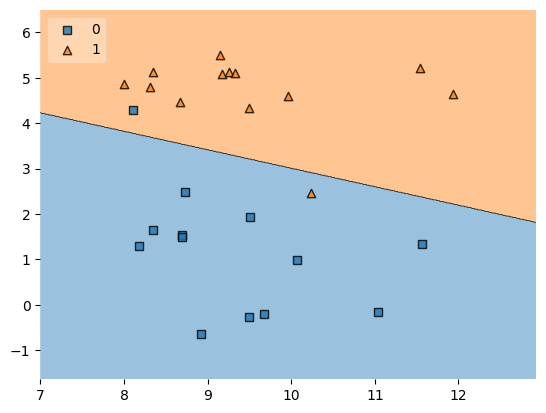

In [ ]:
# Raw Data Loading
x_data, t_data = mglearn.datasets.make_forge()  # 데이터를 불러들여요!
# 데이터가 2개 나와요.
# 그 중 하나는 x_data로 사용할거에요!, feature로 사용할 거에요!
# 나머지 하나는 t_data로 사용할거에. 종속변수(target)로 사용할 거에요!
t_data
x_data

# matplotlib을 이용해서 데이터를 scatter해서 확인할 거에요!
# 각 데이터(x_data)에 대해 t_data가 0이면 red점으로, 1이면 blue점으로 표시해보아요!
x_data_red = x_data[t_data==0]
x_data_blue = x_data[t_data==1]

# plt.scatter(x_data_red[:,0],
#             x_data_red[:,1],
#             color='red')

# plt.scatter(x_data_blue[:,0],
#             x_data_blue[:,1],
#             color='blue')

# plt.show()

# model 생성
model = SVC(kernel='linear',
            C=1)

model.fit(x_data,t_data)  # 이미 어느정도 정규화가 되어있어서 그냥 사용해도 된다!

# 모델 학습이 끝나요!
# 우리가 알아낸 support vector는 어떤거 일까요?
model.support_vectors_  # support vector 전부 출력
model.n_support_  # [3, 3] -> 클래스(분류)가 2개, 각 분류에 support vector가
                  # 3개씩 있다는 의미

# decision boundaries를 그려보아요!
plot_decision_regions(X = x_data,
                      y = t_data,
                      clf=model, # clf -> 우리가 만든 모델을 넣어줘야 함!
                      legend=2)  # 범례, 여기서는 클래스 개수 넣어주면 됨!(red,blue 2개)
plt.show()

In [ ]:
# 대충 이해했으니 연습을 해보아요!
# 이진분류를 해봤으니
# Multinomial Classification(다중분류)을 SVM으로 구현해 보아요!
# iris 데이터를 가지고 해보아요!

# decision boundaries 찾아서 그래프를 그려 보세요!
# 그런데 feature가 4개에요!(2차원 평면에 표현이 불가)

# 차원축소를 이용해 새로운 2개의 feature를 생성하던가!!
# 아니면 상관관계 분석과 같은걸 통해 필요없는 feature를 제거!!

# 이번에는 차원축소가 아닌 상관관계가 높은 2개의 feature만 사용
# 꽃받침(sepal)의 길이와 너비만 사용(feature 2개)

# 필요 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

In [ ]:
# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(data = iris.data,
                 columns = ['sepal_height', 'sepal_width', 'petal_height','petal_width'])
df['target'] = iris.target

df = df[['sepal_height','sepal_width','target']]
df

# 결측치, 이상치는 실제 데이터이므로 처리 x
# 정규화 진행
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target'].values

scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm , t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3)

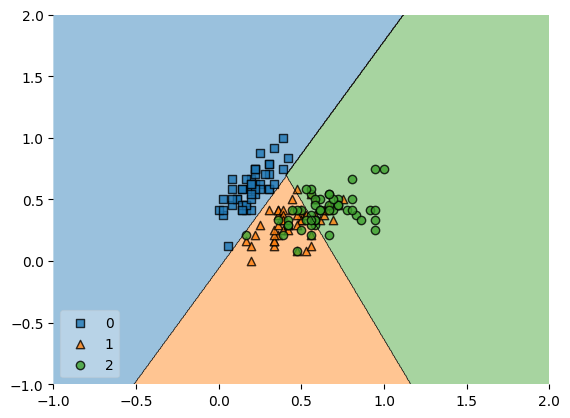

0.8444444444444444

In [ ]:
# Model 생성
sklearn_model = LogisticRegression()

sklearn_model.fit(x_data_train_norm,
                  t_data_train)

predict = sklearn_model.predict(x_data_test_norm)

score = accuracy_score(t_data_test,predict)
score

# Support Vector
model = SVC(kernel='linear',
            C=500)

model.fit(x_data_train_norm,t_data_train)
model.support_vectors_
model.n_support_

plot_decision_regions(X=x_data_norm,
                      y=t_data,
                      clf=model,
                      legend=3)
plt.show()
score

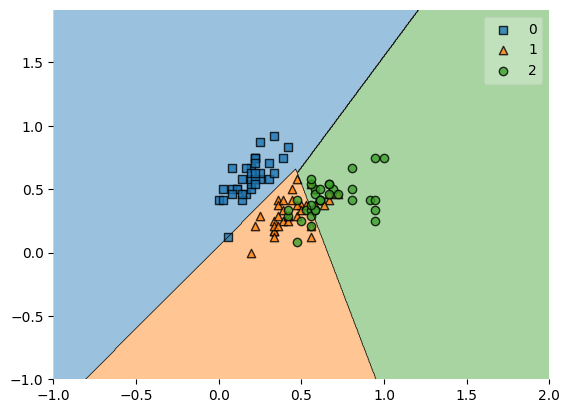

0.7777777777777778

In [ ]:
# 위 구현 강사님 ver.
# 나의 오착 -> 같은 모델인데 쓸데없이 로지스틱 회귀 부분 추가한 것!!

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length','sepal_width','petal_height','petal_width']
df['target'] = iris.target
df

# 결측치, 이상치, 중복데이터, 정규화 등등의 feature engineering과
# 데이터 전처리가 진행이 되야겠죠

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
x_data = df.drop(['petal_height','petal_width','target'],axis=1,inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=1)

# model 생성
model = SVC(kernel='linear',
            C=3)  # 기본값은 1, C -> 경계 넘어서 다른것 있는거 허용 의미
model.fit(x_data_train_norm,
          t_data_train)

# Evaluation을 진행해 보아요!
result = accuracy_score(t_data_test, model.predict(x_data_test_norm))
result

plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()
result

In [ ]:
# 위에서 구현한 것처럼 무지성으로 두개의 feature를 그냥 없애버렸더니
# 결과가 상당히 좋지 않게 나왔어요!

# 잘못버렸다!! feature를 잘못 삭제한 것 같아요!
# 실제 의미있는 feature를 삭제하고 의미 없는 feature를 포함시킨 것 같아요!

# 차라리 2차원으로 표현할거면 PCA(주성분 분석)을 통해서 차원축소 하는게
# 좋을듯 싶어요!

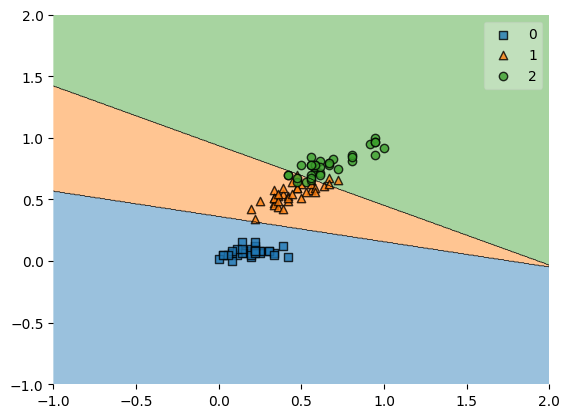

0.8444444444444444

In [ ]:
# 길이만 가지고 해보려 해요!
# 꽃받침의 길이와 꽃잎의 길이만 가지고 학습을 진행해 보아요!

# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length','sepal_width','petal_height','petal_width']
df['target'] = iris.target
df

# 결측치, 이상치, 중복데이터, 정규화 등등의 feature engineering과
# 데이터 전처리가 진행이 되야겠죠

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 이제 x_data와 t_data를 추출하면 될 거 같아요!
x_data = df.drop(['sepal_width','petal_width','target'],axis=1,inplace=False).values
t_data = df['target'].values

# 데이터 분리보다 정규화를 먼저 진행하는게 조금 더 편해요!
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 stratify=t_data,
                 test_size=0.3,
                 random_state=1)

# model 생성
model = SVC(kernel='linear',
            C=0.5)  # 기본값은 1, C -> 경계 넘어서 다른것 있는거 허용 의미
model.fit(x_data_train_norm,
          t_data_train)

# Evaluation을 진행해 보아요!
result = accuracy_score(t_data_test, model.predict(x_data_test_norm))
result

plot_decision_regions(X=x_data_train_norm,
                      y=t_data_train,
                      clf=model)
plt.show()
result

# 그래도 그다지 좋지는 않네요

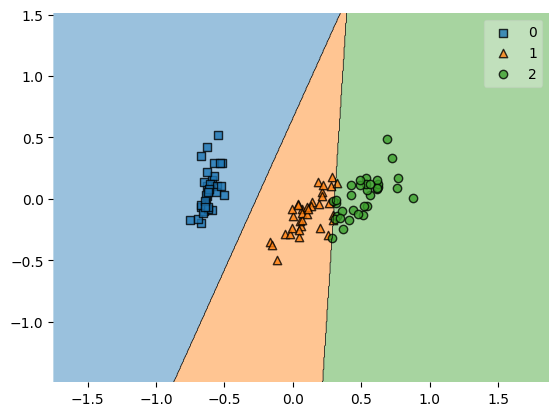

0.9333333333333333

In [ ]:
# 주성분 분석을 통해 차원축소된 데이터를 이용해서
# 한번 처리해 보아요!

# PCA를 통해 차원축소된 데이터로 처리하면 결과가 어떻게 될까요?
# 필요한 module import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA

# Raw Data Loading
iris = load_iris()

# DataFrame으로 변환해서 처리하는게 쉽고 편해요!
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length','sepal_width','petal_height','petal_width']
df['target'] = iris.target
df

# 결측치, 이상치, 중복데이터, 정규화 등등의 feature engineering과
# 데이터 전처리가 진행이 되야겠죠

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 데이터 분리
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# PCA를 활용한 차원축소
pca=PCA(n_components=2)
x_data_norm_pca = pca.fit_transform(x_data_norm)

# 데이터 분리
x_data_train_norm_pca, x_data_test_norm_pca, t_data_train, t_data_test = \
train_test_split(x_data_norm_pca,
                 t_data,
                 test_size=0.3,
                 stratify=t_data)

# model 생성
model = SVC(kernel='linear',
            C=1)
model.fit(x_data_train_norm_pca,
          t_data_train)

# 평가 진행
result = accuracy_score(t_data_test, model.predict(x_data_test_norm_pca))
result

# 시각화
plot_decision_regions(X=x_data_train_norm_pca,
                      y=t_data_train,
                      clf=model)
plt.show()
result

In [ ]:
# 마지막으로 SVM으로 모델을 생성해 볼껀데!!
# 사용하는 데이터는 iris 데이터를 이용
# feature의 개수는 4개를 다 이용
# hyperparameter를 지정해서 모델을 생성해야 하는데 이 작업을 자동화 시킬거에요!
# 코드가 좀 어려우니까 잘 이해하는게 중요!

import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Raw Data Loading
iris = load_iris()
df = pd.DataFrame(iris.data,
                  columns=iris.feature_names)
df.columns = ['sepal_length','sepal_width','petal_height','petal_width']
df['target'] = iris.target
df

# 결측치와 이상치는 없다고 가정하고 진행!
# 중복데이터 처리
df = df.drop_duplicates()

# 데이터 분리
x_data = df.drop('target',axis=1,inplace=False).values
t_data = df['target'].values

# 정규화
scaler = MinMaxScaler()
scaler.fit(x_data)
x_data_norm = scaler.transform(x_data)

# 데이터 분리
x_data_train_norm, x_data_test_norm, t_data_train, t_data_test = \
train_test_split(x_data_norm,
                 t_data,
                 test_size=0.3,
                 stratify=t_data,
                 random_state=0)  # random_state 설정안하면 결과값 계속 바뀜!

# param_grid를 하나 설정해요!
param_grid = [{
    'kernel' : ['linear'],
    'C' : [0.1, 0.5, 10, 100]  # 총 4번 실행하라는 의미
},{
    'kernel' : ['rbf'],
    'C' : [0.1, 0.5, 10, 100],
    'gamma' : [0.001, 0.01, 0.1]
}]  # 이 경우, 총 16개의 모델 생성(4+12)

# Model을 만들어요!
model = SVC()  # 설정을 안한 이유 -> 위에서 이미 만들어놨기 때문

grid_search = GridSearchCV(model,
                           param_grid,
                           cv=5,  # k-fold crossvalidation의 k
                           scoring='accuracy', # 평가 옵션
                           verbose=1)  # verbose=2로 잡으면 세부적인 것도 알려줌

grid_search.fit(x_data_train_norm,
                t_data_train)

# 당연히 가장 좋은 parameter가 어떤 parameter인지 알려줘야지 우리가
# 그걸 가져다 사용하겠죠
# 그러면서 그 시점에서 해당 parameter를 이용했을때의 정확도도 같이 알려줘요!

print(grid_search.best_params_)
print(grid_search.best_score_)

# {'C': 10, 'kernel': 'linear'}
# 0.9714285714285713

#
model = SVC(kernel='linear',
           C=10)
model.fit(x_data_train_norm,
          t_data_train)
accuracy_score(t_data_test,model.predict(x_data_test_norm))


Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 10, 'kernel': 'linear'}
0.9709523809523809


1.0